In [83]:
# Importar librerias necesarias para el modelo
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
from math import sqrt

from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError

from keras import regularizers


### Cargue de datos

Se realiza el cargue de los datos entregados para el proyecto.

In [52]:
# Cargar los datos
# Cargar los datos nuevamente
train_data = pd.read_csv('trainReg.csv')
test_data = pd.read_csv('testReg.csv')
info_dataset = train_data.shape
print(f'Daset compuesto por {info_dataset[0]} Filas y  {info_dataset[1]} columas.')

# Asegurarse de eliminar 'ID' antes de realizar análisis de correlación
if 'ID' in train_data.columns:
    train_data = train_data.drop(columns=['ID','V3'])
if 'ID' in test_data.columns:
    test_id = test_data['ID']  # Guardar IDs para uso posterior
    test_data = test_data.drop(columns=['ID','V3'])

# Se toman las 12 primeras columnas del SET de datos
datos_principaleS_train = train_data[['Y', 'V1', 'V2', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10','V11', 'V12']]


Daset compuesto por 77779 Filas y  92 columas.


### Exploración de los datos para su entendimiento dentro del contexto organizacional

In [53]:
print("Primeras filas del conjunto de datos:")
train_data.head()

Primeras filas del conjunto de datos:


,Y,V1,V2,V4,V5,V6,V7,V8,V9,V10,...,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90
0,2013,44.81144,0.83826,7.91314,10.94148,-0.04547,-15.16332,-10.47324,14.17212,10.57382,...,-8.44873,-230.30484,-40.94698,48.20025,-0.28694,155.76251,-56.23579,13.62599,123.92018,10.02845
1,1998,41.99180,7.99976,64.26707,16.54115,-9.28737,-40.73524,33.60440,9.18802,-6.79144,...,18.68972,-44.06062,52.37792,81.36093,-14.81111,151.66273,-120.61213,10.57519,-3.21078,-1.07438
2,1998,42.19196,2.23111,65.07719,24.99746,1.76100,6.66573,3.45778,-24.42779,-18.45069,...,-3.69878,-118.95712,54.15529,-23.32168,-9.65067,-83.83055,-141.17594,7.33084,-275.69714,2.35522
3,1998,39.28634,-1.85716,91.04190,9.08333,0.08502,-5.59216,65.62463,8.33105,11.70269,...,20.89044,-18.53135,176.09769,351.33669,3.44682,121.69156,-270.43989,12.51659,-140.88884,-0.23476
4,1998,40.36025,2.94918,53.83723,13.71369,-8.21964,-40.21636,21.22366,17.16742,0.14463,...,19.91979,34.59026,-69.83720,102.31946,8.08807,135.08089,-153.02327,4.09207,-68.33046,-6.19159


In [54]:
print("Estadísticas descriptivas:")
datos_principaleS_train.describe()

Estadísticas descriptivas:


,Y,V1,V2,V4,V5,V6,V7,V8,V9,V10,V11,V12
count,77779.000000,77779.000000,77779.000000,77779.000000,77779.000000,77779.000000,77779.000000,77779.000000,77779.000000,77779.000000,77779.000000,77779.000000
mean,2002.308129,43.425185,-0.136720,3.755313,-2.339768,-1.643095,-6.814997,-9.587264,3.749572,1.948512,8.674857,1.977878
std,10.811038,6.128869,4.370466,17.609183,14.483975,7.898574,22.980515,12.911914,10.638581,6.430093,35.096050,52.159787
min,1926.000000,4.836880,-69.680870,-165.221610,-121.475340,-72.503850,-152.407550,-70.693420,-119.487530,-41.631660,-249.107450,-329.571380
25%,1998.000000,40.060315,-2.612435,-7.016240,-10.685075,-6.300690,-21.265305,-18.583065,-2.289400,-2.270755,-11.115595,-25.009270
50%,2006.000000,44.323850,-0.063000,2.022100,-2.054560,-1.586240,-6.307610,-11.238330,3.928440,1.897680,10.894150,9.370100
75%,2010.000000,47.900080,2.465950,12.776450,6.423900,3.077055,7.617995,-2.329330,10.039325,6.163805,29.762770,37.117870
max,2014.000000,60.034010,23.815260,274.658580,160.815220,68.447960,262.068870,112.971410,80.787120,39.976830,262.283040,304.266390


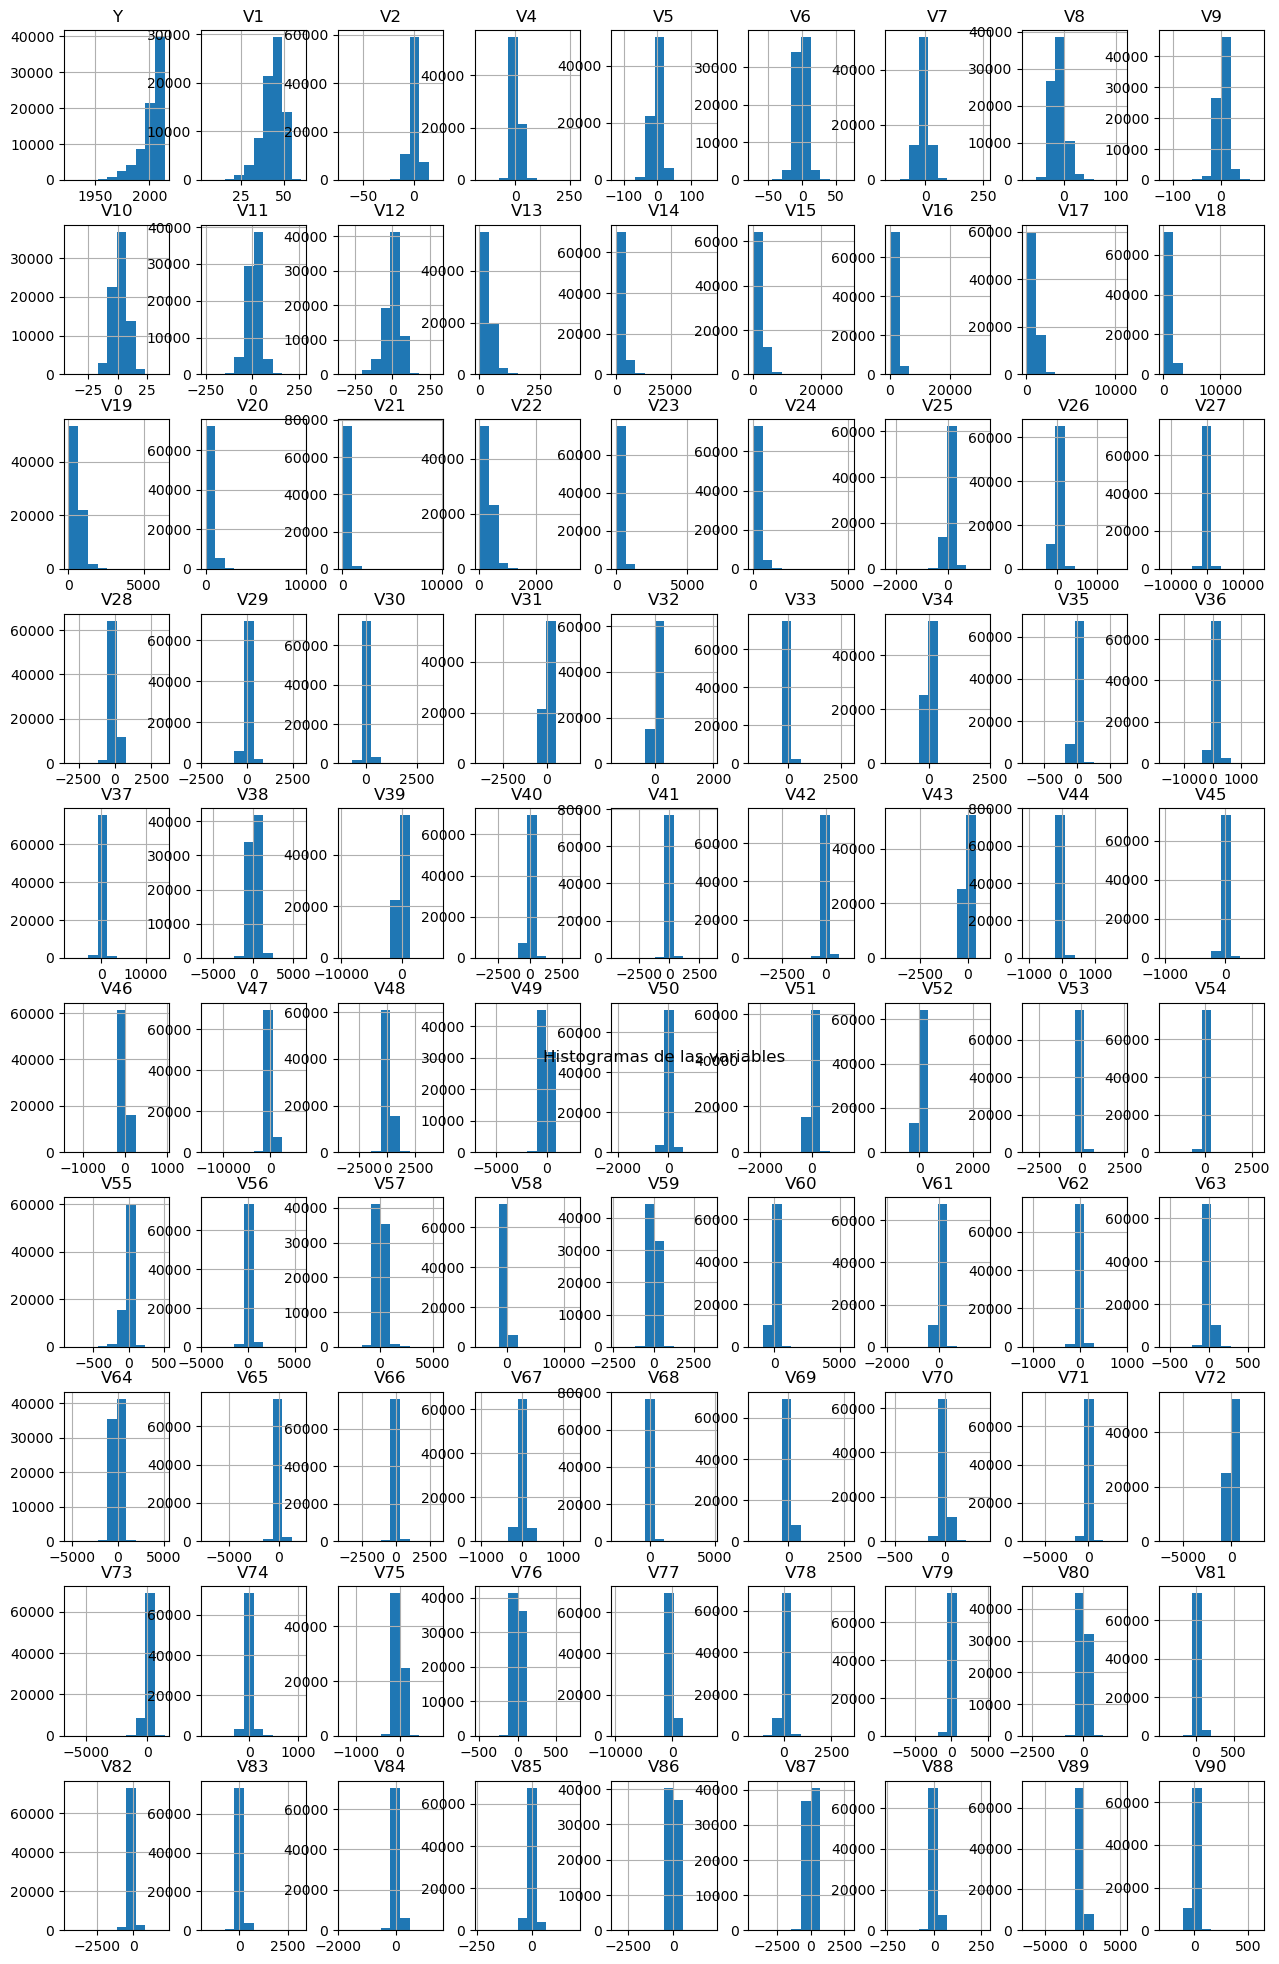

In [55]:
# Visualizar histogramas de las variables
train_data.hist(figsize=(15, 10))
plt.subplots_adjust(left=0.1, right=0.9, top=2, bottom=0.1, hspace=0.3, wspace=0.3)
plt.suptitle('Histogramas de las variables', fontsize=12)
plt.show()

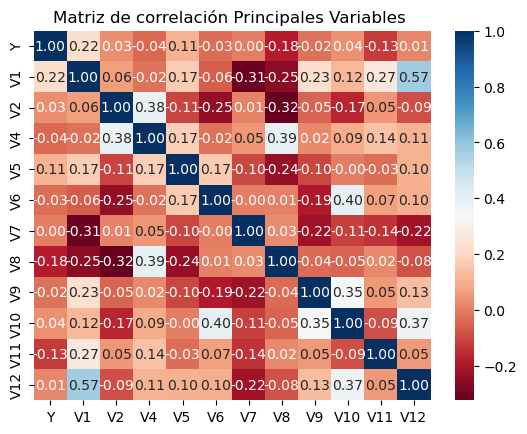

In [43]:
import seaborn as sns
# Calcular la matriz de correlación
correlation_matrix = datos_principaleS_train.corr()


# Visualizar el correlograma con paleta de colores 'RdBu'
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', fmt=".2f")
plt.title('Matriz de correlación Principales Variables ', fontsize=12)
plt.show()

c:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


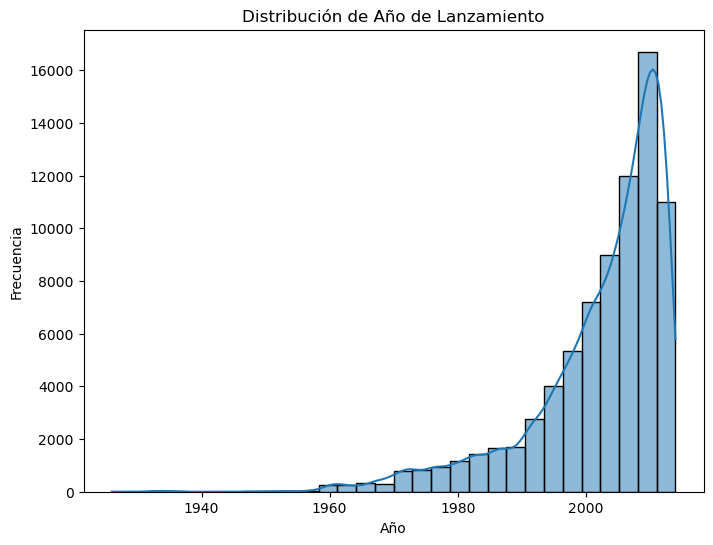

In [56]:
# Visualizar la distribución de la variable objetivo (Año)
plt.figure(figsize=(8, 6))
sns.histplot(datos_principaleS_train['Y'], bins=30, kde=True)
plt.title('Distribución de Año de Lanzamiento')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.show()


## Análisis del set de datos

Se realiza el análisis exploratorio del set de datos destinado para entrenamiento del cual se observa lo siguiente:

#### Descripción del set de datos:

* El set de datos está compuesto por 77.779 filas y 92 columnas.
* Se eliminaron las columnas ID y V3 antes del análisis.
    * La columna ID se eliminó ya que es el identificador único de cada canción en el set de datos.
    * La columna V3 se eliminó ya que no contiene valores.

#### Análisis descriptivo:

* Se realizo el análisis sobre las 12 primeras variables del set de datos, de las cuales es posible observar que tienen una distirbución normal.


#### Análisis de correlación:

* Al realizar el análisis de correlación de variables se detecta un correlación positiva entre las variables V1, V2, V4 y V5.


#### Distribución temporal de las canciones:

* Sobre las canciones disponibles en el set de datos se puede observar que la mayoría se encuentran sobre los años 2000, esto indica que es posible que se trate de timbres similares o recientes.



### Preparación de los datos para poder utilizarlos como entrada para modelos predictivos

In [58]:
# Función para crear características
def create_features(data):
    # Adjusted range to exclude 'V3'
    timbre_cols = [f"V{i}" for i in range(1, 13) if i != 3]
    
    # Check if all required timbre columns except V3 exist
    if all(col in data.columns for col in timbre_cols):
        data['mean_timbre'] = data[timbre_cols].mean(axis=1)
        data['median_timbre'] = data[timbre_cols].median(axis=1)
        data['std_timbre'] = data[timbre_cols].std(axis=1)
        data['sum_timbre'] = data[timbre_cols].sum(axis=1)
        data['max_timbre'] = data[timbre_cols].max(axis=1)
        data['min_timbre'] = data[timbre_cols].min(axis=1)
        data['prod_timbre'] = data[timbre_cols].prod(axis=1)
    else:
        print("Algunas columnas necesarias (V1, V2, V4 a V12) no existen en el DataFrame")
    # Check if all covariance columns (V13 to V90) exist
    if all(f"V{i}" in data.columns for i in range(13, 91)):
        covariance_cols = [f"V{i}" for i in range(13, 91)]
        data['mean_covariance'] = data[covariance_cols].mean(axis=1)
        data['median_covariance'] = data[covariance_cols].median(axis=1)
        data['std_covariance'] = data[covariance_cols].std(axis=1)
        data['sum_covariance'] = data[covariance_cols].sum(axis=1)
        data['max_covariance'] = data[covariance_cols].max(axis=1)
        data['min_covariance'] = data[covariance_cols].min(axis=1)
        # Using logarithmic addition to prevent overflow in product
        data['prod_covariance'] = np.exp(data[covariance_cols].apply(np.log).sum(axis=1))
    else:
        print("Algunas columnas de V13 a V90 no existen en el DataFrame")

    return data
# Aplicar la creación de características
train_data = create_features(train_data)
test_data = create_features(test_data)

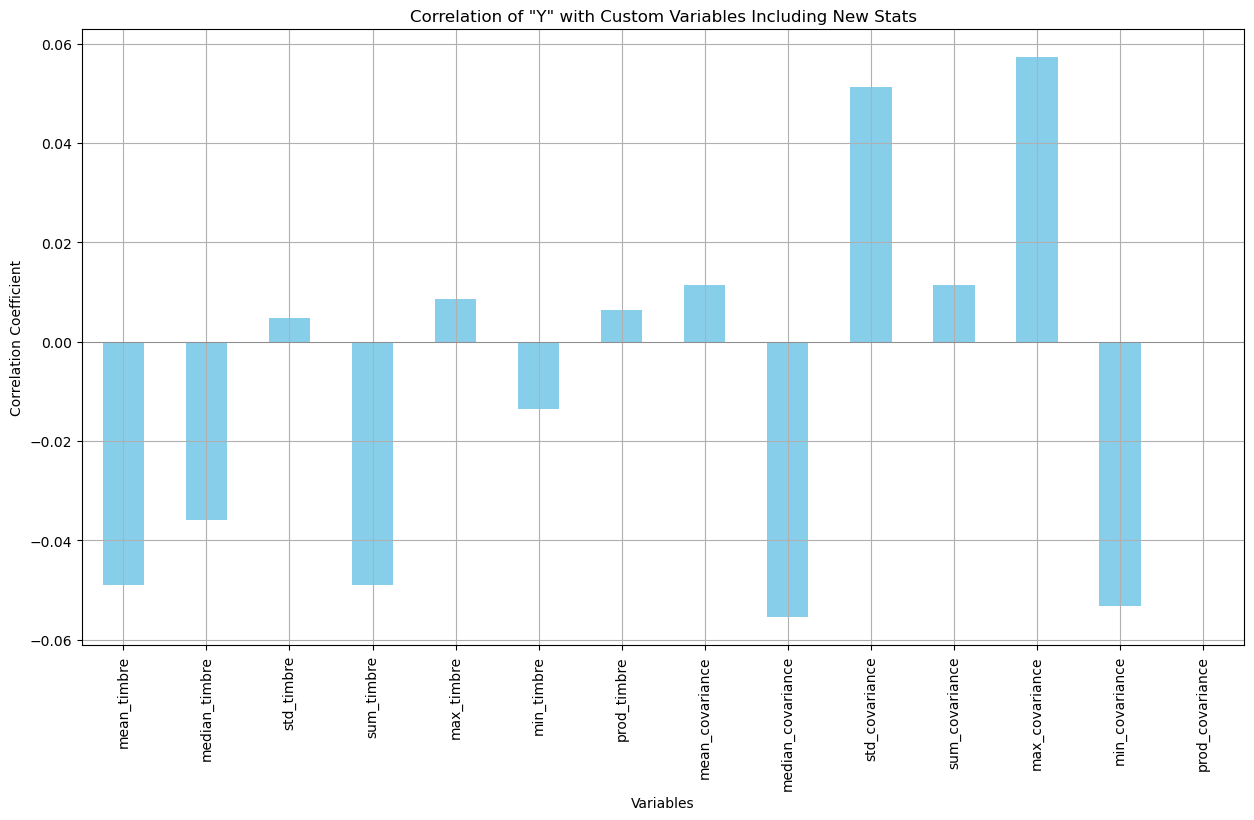

In [59]:
import matplotlib.pyplot as plt
def plot_corr(data):
    # Calculate the correlation matrix
    correlation_matrix = data.corr()
    
    # Extended list of custom variables including new stats
    custom_vars = [
        'mean_timbre', 'median_timbre', 'std_timbre', 'sum_timbre', 'max_timbre', 'min_timbre', 'prod_timbre',
        'mean_covariance', 'median_covariance', 'std_covariance', 'sum_covariance', 'max_covariance', 'min_covariance', 'prod_covariance'
    ]
    
    # Extract correlation with 'Y' for custom variables only
    correlation_with_y_custom = correlation_matrix['Y'][custom_vars]

    # Plotting
    plt.figure(figsize=(15, 8))  # Increased size for better visibility with more variables
    correlation_with_y_custom.plot(kind='bar', color='skyblue')
    plt.title('Correlation of "Y" with Custom Variables Including New Stats')
    plt.xlabel('Variables')
    plt.ylabel('Correlation Coefficient')
    plt.grid(True)
    plt.axhline(0, color='gray', linewidth=0.5)  # Add a line at zero for reference
    plt.show()

# Note: All function calls have been commented out. Uncomment when needed for execution.

plot_corr(train_data)

In [60]:
# Calculando la correlación entre todas las características y la variable objetivo
correlation_matrix = train_data.corr()
target_correlation = correlation_matrix['Y'].sort_values(ascending=False)
correlation_matrix
correlation_matrix = train_data.corr()
target_correlation = correlation_matrix['Y'].sort_values(ascending=False)
target_correlation

# Identificando características con baja correlación con el objetivo (umbral de 0.01)
important_features = target_correlation[abs(target_correlation) > 0.01]

# Identificar características altamente correlacionadas entre sí para evitar multicolinealidad
# Usaremos un umbral de 0.7 para alta correlación
high_corr_matrix = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

to_drop = [column for column in high_corr_matrix.columns if any(high_corr_matrix[column] > 0.7)]

# Filtrar la lista de características importantes eliminando las altamente correlacionadas
selected_features = important_features.index.difference(to_drop)
selected_features
selected_features2 = selected_features.difference(['Y'])
selected_features2
train_data = train_data[selected_features]
test_data = test_data[selected_features2]


In [61]:
# Divisón del set de datos 

# Asegurarse de eliminar 'ID' antes de realizar análisis de correlación
train_data.drop(columns=['ID'], inplace=True, errors='ignore')
test_data.drop(columns=['ID'], inplace=True, errors='ignore')

# División de datos
X_train, X_val, y_train, y_val = train_test_split(train_data.drop(columns=['Y']), train_data['Y'], test_size=0.15, random_state=42)

# Escalado de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Comprobar NaN en datos escalados
if np.isnan(X_train_scaled).any() or np.isnan(X_val_scaled).any():
    raise ValueError("Los datos escalados contienen NaN")

C:\Users\Usuario\AppData\Local\Temp\ipykernel_35364\948552729.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(columns=['ID'], inplace=True, errors='ignore')


## Análisis preparación del set de datos

Tomando como base las primeras 12 variables del conjunto de datos, hemos calculado nuevas variables que servirán como predictores durante el proceso de entrenamiento. 

1. mean_timbre (Timbre promedio)
2. median_timbre (Timbre mediano)
3. std_timbre (Desviación estándar del timbre)
4. sum_timbre (Suma del timbre)
5. max_timbre (Máximo del timbre)
6. min_timbre (Mínimo del timbre)
7. prod_timbre (Producto del timbre)
8. mean_covariance (Covarianza promedio)
9. median_covariance (Covarianza mediana)
10. std_covariance (Desviación estándar de la covarianza)
11. sum_covariance (Suma de la covarianza)
12. max_covariance (Máximo de la covarianza)
13. min_covariance (Mínimo de la covarianza)
14. prod_covariance (Producto de la covarianza)

Una vez que se han generado estas características adicionales, se procedió a estandarizar las variables predictoras utilizando StandardScaler. Esta estandarización ajusta las variables para que tengan una media de 0 y una desviación estándar de 1, lo que facilita el proceso de entrenamiento de modelos y asegura una mejor convergencia durante el proceso de optimización.

### Análisis preliminar de selección de modelos relevantes para responder a la pregunta

In [73]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

def OptimizedModel(epocas, optimizador, batch_sz, XTrain, YTrain, XTest, YTest):


    XTrainBest = XTrain
    XTestBest = XTest

    model = Sequential()
    model.add(Dense(502, activation='relu', input_shape=(XTrainBest.shape[1],)))
    model.add(Dense(256, activation='elu'))
    model.add(Dense(128, activation='elu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='elu'))
    model.add(Dense(1, activation='linear'))


    # Compile the model
    model.compile(loss=MeanSquaredError(), optimizer=optimizador, metrics=[RootMeanSquaredError()])

    # Train the model
    model.fit(XTrainBest, YTrain, epochs=epocas, batch_size=batch_sz, validation_split=0.2, verbose=1, callbacks=[es])


    # Evaluate the model
    resultado = model.evaluate(XTestBest, YTest, return_dict=True)

    return epocas, optimizador, resultado.get('root_mean_squared_error'), batch_sz



def OptimizedModelAdam(epocas, batch_sz, XTrain, YTrain, XTest, YTest, learning_rate):

    XTrainBest = XTrain
    XTestBest = XTest

    model = Sequential()
    model.add(Dense(502, activation='relu', input_shape=(XTrainBest.shape[1],)))
    model.add(Dense(256, activation='elu'))
    model.add(Dense(128, activation='elu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='elu'))
    model.add(Dense(1, activation='linear'))

    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss=MeanSquaredError(), optimizer=optimizer, metrics=[RootMeanSquaredError()])

    # Train the model
    model.fit(XTrainBest, YTrain, epochs=epocas, batch_size=batch_sz, validation_split=0.2, verbose=1, callbacks=[es])


    # Evaluate the model
    resultado = model.evaluate(XTestBest, YTest, return_dict=True)

    return epocas, resultado.get('root_mean_squared_error'), batch_sz, learning_rate


In [70]:
resultado = list()

epocas = [50, 100]
optimizador= ['Adam',  'Adadelta', 'Adamax']
batch_size = [32,64]

for o in optimizador:
    for e in epocas:
        for b in batch_size:
                ret = OptimizedModel(e, o, b, X_train_scaled, y_train, X_val_scaled, y_val)
                resultado.append([ret])

Epoch 1/50
1653/1653 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 453689.7812 - root_mean_squared_error: 585.3382 - val_loss: 150.8682 - val_root_mean_squared_error: 12.2828
Epoch 2/50
1653/1653 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 107.3688 - root_mean_squared_error: 10.3602 - val_loss: 111.4391 - val_root_mean_squared_error: 10.5565
Epoch 3/50
1653/1653 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 99.3189 - root_mean_squared_error: 9.9652 - val_loss: 130.6052 - val_root_mean_squared_error: 11.4283
Epoch 4/50
1653/1653 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 110.0464 - root_mean_squared_error: 10.4895 - val_loss: 98.2610 - val_root_mean_squared_error: 9.9127
Epoch 5/50
1653/1653 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 114.2407 - root_mean_squared_error: 10.6789 - val_loss: 183.1783 - val_root_mean_squared_error: 13.5343
Epoch 6/50
1653/1653 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 114.2879 - root_mean_squared_error: 10.6878 - val_loss: 95.4484 - val_root_mean_squared_error: 9.7698
Epoch 

In [79]:
# Flatten the list of tuples
flattened_data = [item for sublist in resultado for item in sublist]

# Convert the flattened data into a DataFrame
df = pd.DataFrame(flattened_data, columns=['Epocas', 'Modelo', 'RMSE', 'Learning rate'])

# Order the DataFrame by the third position (Value3) in ascending order
df_sorted = df.sort_values(by='RMSE', ascending=True)

df_sorted.head(10)

,Epocas,Modelo,RMSE,Learning rate
0,50,Adam,8.935256,32
10,100,Adamax,9.316666,32
1,50,Adam,9.320942,64
3,100,Adam,9.358819,64
8,50,Adamax,9.643458,32
9,50,Adamax,9.710032,64
2,100,Adam,9.784650,32
11,100,Adamax,10.365621,64
6,100,Adadelta,295.531036,32
4,50,Adadelta,306.130829,32


In [76]:
resultado_adam_opt = list()

epocas = [50, 100]
batch_size = [16,32,64]
learning_rates = [0.001,0.005,0.009,0.01, 0.05, 0.09, 0.1, 0.5, 0.9]

for e in epocas:
    for b in batch_size:
        for l in learning_rates:
                ret = OptimizedModelAdam(e, b, X_train_scaled, y_train, X_val_scaled, y_val, l)
                resultado_adam_opt.append([ret])


Epoch 1/50
3306/3306 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 297773.0938 - root_mean_squared_error: 460.7488 - val_loss: 104.3359 - val_root_mean_squared_error: 10.2145
Epoch 2/50
3306/3306 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 108.0031 - root_mean_squared_error: 10.3906 - val_loss: 116.2921 - val_root_mean_squared_error: 10.7839
Epoch 3/50
3306/3306 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 123.1659 - root_mean_squared_error: 11.0963 - val_loss: 119.7344 - val_root_mean_squared_error: 10.9423
Epoch 4/50
3306/3306 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 118.9674 - root_mean_squared_error: 10.9047 - val_loss: 102.0721 - val_root_mean_squared_error: 10.1031
Epoch 5/50
3306/3306 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 117.7859 - root_mean_squared_error: 10.8519 - val_loss: 92.1441 - val_root_mean_squared_error: 9.5992
Epoch 6/50
3306/3306 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 108.9500 - root_mean_squared_error: 10.4346 - val_loss: 115.5125 - val_root_mean_squared_error: 10.7477

In [81]:
# Flatten the list of tuples
flattened_data = [item for sublist in resultado_adam_opt for item in sublist]

# Convert the flattened data into a DataFrame
df = pd.DataFrame(flattened_data, columns=['Epocas', 'RMSE', 'Batch Size', 'Learning Rate'])

# Order the DataFrame by the third position (Value3) in ascending order
df_sorted = df.sort_values(by='RMSE', ascending=True)

df_sorted.head(10)

,Epocas,RMSE,Batch Size,Learning Rate
21,50,8.885938,64,0.010
36,100,8.917037,32,0.001
45,100,8.994738,64,0.001
0,50,9.769394,16,0.001
22,50,10.095973,64,0.050
46,100,10.405894,64,0.005
11,50,10.676520,32,0.009
12,50,10.683104,32,0.010
8,50,10.693462,16,0.900
7,50,10.693480,16,0.500


In [93]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)


optimizer = Adam(learning_rate=0.001)
optimizer1 = Adam(learning_rate=0.001)
optimizer2 = Adam(learning_rate=0.001)
optimizer3 = Adam(learning_rate=0.001)

model = Sequential()
model.add(Dense(502, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(256, activation='elu'))
model.add(Dense(128, activation='elu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='elu'))
model.add(Dense(1, activation='linear'))


model1 = Sequential()
model1.add(Dense(502, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=regularizers.l1(0.01)))
model1.add(Dense(256, activation='elu', kernel_regularizer=regularizers.l1(0.01)))
model1.add(Dense(128, activation='elu', kernel_regularizer=regularizers.l1(0.01)))
model1.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.01)))
model1.add(Dense(32, activation='elu', kernel_regularizer=regularizers.l1(0.01)))
model1.add(Dense(1, activation='linear'))


model2 = Sequential()
model2.add(Dense(502, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=regularizers.l1(0.001)))
model2.add(Dense(256, activation='elu', kernel_regularizer=regularizers.l1(0.001)))
model2.add(Dense(128, activation='elu', kernel_regularizer=regularizers.l1(0.001)))
model2.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
model2.add(Dense(32, activation='elu', kernel_regularizer=regularizers.l1(0.001)))
model2.add(Dense(1, activation='linear'))

model3 = Sequential()
model3.add(Dense(502, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model3.add(Dropout(0.05))
model3.add(Dense(256, activation='elu'))
model3.add(Dropout(0.05))
model3.add(Dense(128, activation='elu'))
model3.add(Dropout(0.05))
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.05))
model3.add(Dense(32, activation='elu'))
model3.add(Dropout(0.05))
model3.add(Dense(1, activation='linear'))


model.compile(loss=MeanSquaredError(), optimizer=optimizer, metrics=[RootMeanSquaredError()])
model1.compile(loss=MeanSquaredError(), optimizer=optimizer1, metrics=[RootMeanSquaredError()])
model2.compile(loss=MeanSquaredError(), optimizer=optimizer2, metrics=[RootMeanSquaredError()])
model3.compile(loss=MeanSquaredError(), optimizer=optimizer3, metrics=[RootMeanSquaredError()])



model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1, callbacks=[es])
model1.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1, callbacks=[es])
model2.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1, callbacks=[es])
model3.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1, callbacks=[es])



result = model.evaluate(X_val_scaled, y_val, return_dict=True)
result1 = model1.evaluate(X_val_scaled, y_val, return_dict=True)
result2 = model2.evaluate(X_val_scaled, y_val, return_dict=True)
result3 = model3.evaluate(X_val_scaled, y_val, return_dict=True)

Epoch 1/100
1653/1653 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 424631.4688 - root_mean_squared_error: 565.2690 - val_loss: 150.0727 - val_root_mean_squared_error: 12.2504
Epoch 2/100
1653/1653 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 105.8027 - root_mean_squared_error: 10.2846 - val_loss: 121.0818 - val_root_mean_squared_error: 11.0037
Epoch 3/100
1653/1653 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 98.7045 - root_mean_squared_error: 9.9346 - val_loss: 109.1671 - val_root_mean_squared_error: 10.4483
Epoch 4/100
1653/1653 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 106.1312 - root_mean_squared_error: 10.3002 - val_loss: 205.0776 - val_root_mean_squared_error: 14.3205
Epoch 5/100
1653/1653 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 110.6587 - root_mean_squared_error: 10.5167 - val_loss: 92.5269 - val_root_mean_squared_error: 9.6191
Epoch 6/100
1653/1653 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 114.4940 - root_mean_squared_error: 10.6975 - val_loss: 83.1520 - val_root_mean_squared_error: 9.1188


In [100]:
model.summary()

Model: "sequential_129"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_760 (Dense)               │ (None, 502)            │        39,658 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_761 (Dense)               │ (None, 256)            │       128,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_762 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_763 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_764 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_765 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 635,075 (2.42 MB)

 Trainable params: 211,691 (826.92 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 423,384 (1.62 MB)

In [4]:





# Modelo
model = Sequential([
    Dense(160, input_dim=X_train_scaled.shape[1], activation='elu'),
    BatchNormalization(),
    Dense(80, activation='elu'),
    BatchNormalization(),
    Dense(45, activation='elu'),
    BatchNormalization(),
    Dense(25, activation='relu'),
    BatchNormalization(),
    Dense(20, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='linear')  # Salida para regresión
])

# Compilación con Adam
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Callback de EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Entrenamiento con EarlyStopping
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_val_scaled, y_val), callbacks=[early_stopping])

# Evaluación
y_pred = model.predict(X_val_scaled)
if np.isnan(y_pred).any():
    raise ValueError("Las predicciones contienen NaN")

rmse = sqrt(mean_squared_error(y_val, y_pred))
print(f'RMSE: {rmse}')

c:\Users\Usuario\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 3913831.5000 - val_loss: 3267433.0000
Epoch 2/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2935001.2500 - val_loss: 1884483.1250
Epoch 3/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1551662.2500 - val_loss: 676709.0000
Epoch 4/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 480123.8125 - val_loss: 83660.4766
Epoch 5/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 43438.6875 - val_loss: 442.2622
Epoch 6/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 181.9567 - val_loss: 75.6197
Epoch 7/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 76.6853 - val_loss: 76.2160
Epoch 8/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 76.2267 - val_loss: 75.4202
Epoch 9/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 77.0505 - val_loss: 77.5758
Epoch 10/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 73.6345 - val_loss: 73.3670
Epoch 11/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - l

In [5]:
### 8.58 LAB - COMPETENCIA: 8.92 DIF = 0.21
test_data2 = pd.read_csv('testReg.csv')
test_ids = test_data2['ID'].copy()
test_data = test_data[selected_features2]

# Asumiendo que 'scaler' y 'model' ya están definidos y entrenados
X_test_scaled = scaler.transform(test_data)
predictions = model.predict(X_test_scaled).flatten()

# Creación de un DataFrame para guardar las predicciones junto con los IDs
output = pd.DataFrame({'ID': test_ids, 'Y': np.round(predictions).astype(int)})
output.to_csv('predictions2704f.csv', index=False)
print("Predicciones guardadas en 'predictionsfinalfinal.csv'.")

584/584 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Predicciones guardadas en 'predictionsfinalfinal.csv'.


In [ ]:
### RMSE 8.429 en LAB y 8.73 en Competencia.